In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [43]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [44]:
#读取数据
path1 ='datas/winequality-red.csv'
df1 = pd.read_csv(path1,sep=";")
df1['type'] = 1 #设置数据类型为红葡萄酒

path2 ='datas/winequality-white.csv.csv'
df2 = pd.read_csv(path1,sep=";")
df2['type'] = 2 #设置数据类型为白葡萄酒

#合并两个df
df = pd.concat([df1,df2],axis=0) #axis = 0上下合并

#自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]
#因变量名称
qulity = 'quality'
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1


In [45]:
names1 = []
for i in list(df):
    names1.append(i)

In [46]:
#异常数据处理
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any') # 只要数据为空，就进行删除操作
X = datas[names]
Y = datas[qulity]
Y.ravel()  #?what is ravel()

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [47]:
models = [
    Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',LinearRegression())
    ]),
     Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',RidgeCV(alphas = np.logspace(-4,2,20)))  
    ]),
     Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',LassoCV(alphas = np.logspace(-4,2,20)))
    ]),
     Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',ElasticNetCV(alphas = np.logspace(-4,2,20),l1_ratio=np.linspace(0, 1, 5)))
    ])
]

In [48]:
plt.figure(figsize =( 26,8),facecolor='w')
titles=u'线性回归预测',u'Ridge回归预测',u'Lasso回归预测',u'ElasticNet预测'
#将数据分为训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.01,random_state=0)
ln_x_test = range(len(X_test))
print(ln_x_test)
##给定阶以及颜色
d_pool = np.arange(1,4,1)  #1,2,3阶
m = len(d_pool)
clrs = []
for c in np.linspace(5570560,255,m):
    clrs.append('#%06x'%int(c))

for t in range(4):
    plt.subplot(2,2,t+1)
    model = models[t]
    plt.plot(ln_x_test,Y_test,c= 'r',lw=2,label=u'真实值')
    for i ,d in enumerate(d_pool):
        #设置参数
        model.set_params(Poly__degree=d)
        #模型训练
        model.fit(X_train,Y_train)
        #模型预测及计算R^2
        Y_pre = model.predict(X_test)
        R = model.score(X_train,Y_train)
        #输出信息
        lin = model.get_params()['Linear']
        output = u'%s:%d阶，截距：%d,系数：'%(titles[t],d,lin.intercept_)
        print(output,lin.coef_)
        plt.plot(ln_x_test,Y_pre,c=clrs[i],lw=2,label=u'%d阶预测值，$R^2$=%.3f'%(d,R))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title(titles[t],fontsize=18)
    plt.xlabel('X',fontsize=16) 
    plt.xlabel('Y',fontsize=16)
plt.suptitle(u'葡萄酒质量预测',fontsize=22)

range(0, 32)
线性回归预测:1阶，截距：24,系数： [  0.00000000e+00   2.77243838e-02  -1.07816763e+00  -2.02327650e-01
   1.87792659e-02  -1.83877359e+00   4.00525765e-03  -3.23940775e-03
  -2.00641885e+01  -4.05762391e-01   9.21330102e-01   2.75591533e-01
   1.24420507e-03]
线性回归预测:2阶，截距：-2342436202,系数： [  2.34242437e+09  -6.50574403e+01  -4.03908142e+01  -1.32750193e+02
  -2.77088101e+01  -1.06875014e+03  -6.94425587e+00   2.97346957e+00
   2.59533480e+04  -6.44311237e+02   1.69584590e+02   5.63778009e+01
   3.67399564e-01  -6.01410460e-02  -3.56124961e-01  -1.70011004e-01
  -4.48904121e-02  -2.06075007e+00  -4.87985401e-03   1.22792825e-03
   6.78864813e+01  -4.84394895e-01   1.78106101e-01   4.78257355e-02
  -1.87945476e-02  -7.13204080e-02   1.77308968e+00   1.25404590e-01
   3.19611651e+00  -4.78805151e-02   2.60659134e-02   4.16791325e+01
  -1.78512296e+00  -6.83657469e-01   6.20118460e-01  -5.01410997e-01
   7.35259974e-01   1.04611623e-01   3.09866304e+00   3.99855744e-03
   3.12991442e-03   1.

Ridge回归预测:2阶，截距：1,系数： [  0.00000000e+00  -1.18166896e+01  -1.06546110e+00   3.30702045e+00
  -6.77020539e+00   1.45492144e+00  -6.02190049e+00   2.68721594e+00
  -9.38446163e-01   1.46759106e+00  -6.56673456e-01   1.05889847e+01
   1.58704586e-01  -1.65271617e-02  -1.39555621e-01  -1.11098859e-01
   7.45466173e-03  -9.99133377e-01  -5.90237608e-03   1.35397865e-03
   1.20267856e+01   1.72313505e-01   1.02643965e-01  -2.83049500e-02
   1.14334684e-03  -2.51419281e-01   1.28175538e+00  -1.31220821e-01
   2.90864275e+00  -3.04603019e-02   2.29280369e-02   4.44646354e-01
  -8.01430343e-01  -9.51527842e-01   3.27611488e-01   3.69089986e-02
   4.43425231e-01   9.99564131e-03   3.29255764e+00   1.40332695e-02
   1.97731180e-03   4.60226162e+00  -3.93055215e+00  -1.04972782e+00
   4.62337120e-01   1.77616219e-02  -8.20798491e-03   7.53007264e-01
  -4.38900141e-04   1.10512017e-03   6.69570664e+00   7.80508847e-02
  -1.95537602e-01  -5.61479107e-03  -1.34112452e-04  -6.07856927e+00
  -1.0881348

Lasso回归预测:2阶，截距：0,系数： [  0.00000000e+00   1.45308724e-01  -0.00000000e+00   0.00000000e+00
   1.56186414e-01   0.00000000e+00   5.08463416e-03   5.42651468e-03
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   4.14931347e-01
  -0.00000000e+00  -1.41125964e-02  -1.04495902e-01   3.23980165e-02
   1.13987271e-02  -3.80148468e-01  -4.14716003e-04  -1.11559990e-03
   2.94140405e-01   7.69956676e-02   2.73478306e-02  -3.43695928e-02
  -7.03330684e-04  -2.56084108e-01   5.68176561e-01  -1.02609731e-01
   0.00000000e+00  -2.79219972e-02   1.92410595e-02  -0.00000000e+00
  -3.78556301e-01  -0.00000000e+00   1.04091820e-01  -0.00000000e+00
   1.98640905e-01   2.66367466e-02   0.00000000e+00   5.63300553e-03
   4.63612987e-03   0.00000000e+00  -1.25546034e+00   0.00000000e+00
   2.71278940e-01   0.00000000e+00  -5.31277806e-03   4.83314523e-01
   1.94965678e-03  -7.58007207e-05   0.00000000e+00   1.61405093e-02
  -1.68114247e-01  -1.52716847e-02  -9.55130191e-04   0.00000000e+00
  -9.6510504

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:1阶，截距：4,系数： [  0.00000000e+00   9.28366496e-03  -1.09076410e+00  -1.96501334e-01
   1.00965449e-02  -1.81002355e+00   4.19022470e-03  -3.28670804e-03
  -0.00000000e+00  -4.93360013e-01   8.84470500e-01   2.94482742e-01
   8.04990790e-04]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:2阶，截距：0,系数： [  0.00000000e+00   1.81404887e-01  -3.16043152e-01   0.00000000e+00
   2.20459765e-01   0.00000000e+00   5.75491395e-03   5.47987016e-03
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   4.33151232e-01
  -0.00000000e+00  -1.45668794e-02  -1.02888048e-01   2.04075857e-02
   1.18393126e-02  -5.20784179e-01  -5.51438039e-04  -1.09256015e-03
   3.06680910e-01   7.57829850e-02   3.41665084e-02  -3.69221044e-02
  -1.85138046e-04  -2.42749235e-01   7.58386464e-01  -1.15568031e-01
   2.00499654e-01  -2.76561964e-02   1.95553740e-02  -3.16449391e-01
  -3.10930861e-01  -0.00000000e+00   1.34158847e-01   2.89479723e-03
   3.62151774e-01   2.16303972e-02   7.33894057e-02   7.61484947e-03
   4.17111981e-03   0.00000000e+00  -1.34816334e+00  -0.00000000e+00
   2.90225862e-01  -0.00000000e+00  -5.74269184e-03   5.75135704e-01
   1.90184929e-03  -4.51076505e-05  -1.81585437e-02   6.90806741e-03
  -1.93910385e-01  -1.50917637e-02  -1.79887225e-03   0.00000000e+00
  -1.0381

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:3阶，截距：4,系数： [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   1.42299267e-03
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.0000

Text(0.5,0.98,'葡萄酒质量预测')

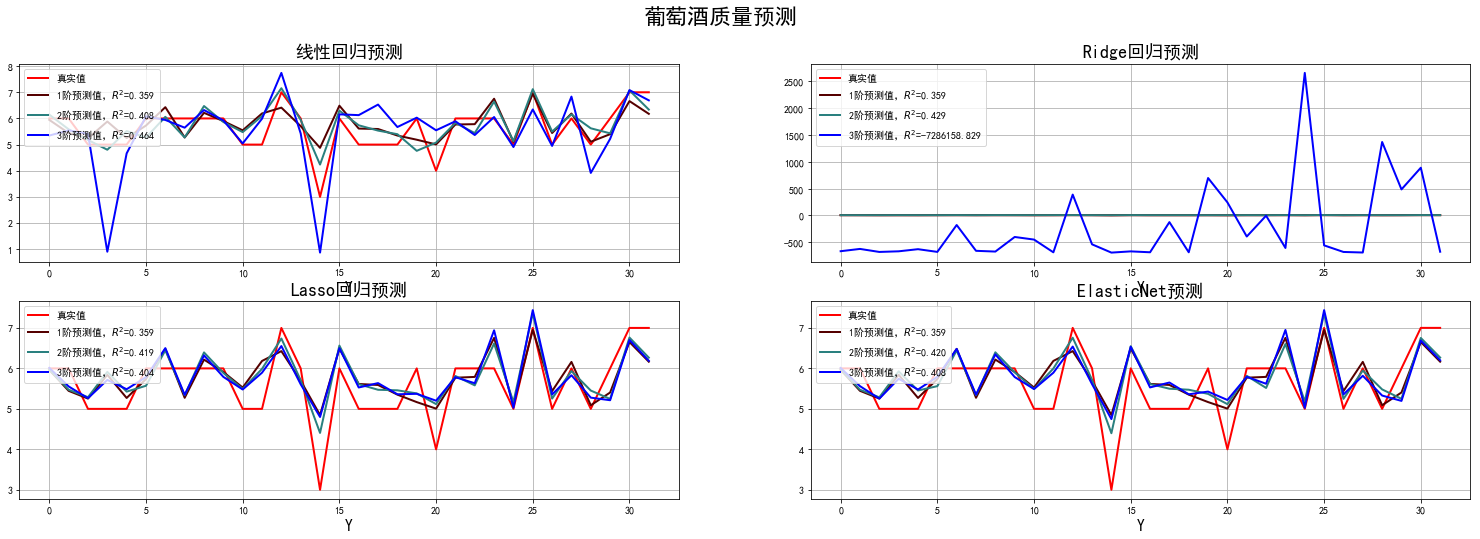

In [49]:
plt.show()